# Курсовая работа

## 1 часть: метод наименьших квадратов

В математике есть множество способов обработки данных и нахождение каких-либо закономерностей, но работать с достаточно большими данными вручную невозможно. Для таких целей можно воспользоваться языком программирования Python!

Начнем  импорта основных полезных библиотек python для выполнения нашей задачи. У насс здесь несколько таких:
    
    numpy -> используется для математических и логических операций с нашими данными
    
    pandas -> Используется для обработки и хранения наших данных
    
    matplotlib -> Используется для визуализации данных, создания графиков и т.д.
    

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matpiotlib inline

UsageError: Line magic function `%matpiotlib` not found.


Теперь возьмем данные из таблицы Excel c помощью библиотеки pandas. С ней удобно работать так как обычно задачи для обработки содержат достаточно много данных, которые автоматически записываются в таблицы.

In [6]:
data = pd.read_excel('https://github.com/YuraAn/coursework/raw/main/210_1.xlsx', sheet_name = 'Анастасов')
print(data.head())

    x      y
0   0  10.50
1   8  10.46
2  10  10.46
3  19  10.45
4  20  10.45


In [19]:
x = data.values.T[0]
print(x)

[  0.   8.  10.  19.  20.  30.  39.  50.  58.  75.  78. 100. 117. 125.
 150. 152. 200. 221. 250. 285. 300. 373. 400. 500. 598. 600. 700. 800.
 896.]


In [20]:
y = data.values.T[1]
print(y)

[10.5  10.46 10.46 10.45 10.45 10.45 10.45 10.24 10.06  9.86  9.83  9.67
  9.5   9.32  8.76  8.71  8.53  8.45  8.26  7.96  7.77  6.8   6.55  5.78
  5.3   5.29  5.01  4.72  4.44]


![вывод формулы](https://github.com/YuraAn/coursework/raw/main/derivation_of_formula.jpg)

In [26]:
N = x.shape[0]
mx = sum(x)/N
print(mx)

246.68965517241378


In [27]:
my = sum(y)/N
print(my)

8.414827586206897


In [28]:
a2 = np.dot(x.T, x)/N
a11 = np.dot(x.T, y)/N

In [29]:
k = (a11- mx*my)/(a2-mx**2)
b = my -k*mx
print("k =" and k)
print("b =" and b)

-0.007788256207208271
10.336109824357516


Построим график прямой и изначальных точек.

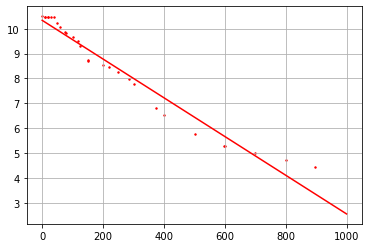

In [31]:
f = np.array([k*z+b for z in range(1000)])
plt.plot(f, c = 'red')
plt.scatter(x,y, s=2, c = 'red')
plt.grid(True)
plt.show()

In [ ]:
С помощью Python можно легко решить эту задачу. Она может быть и прикладной. 

# 2 часть: политом Лагранжа

Интерполяционный многочлен Лагранжа - это самый простой способ вычислить функцию, проходящую через данные точки. Степень многочлена, который проходит через N точек, будет (N-1). Напишем программу, которая строит этот многочлен.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data1 = pd.read_excel('https://github.com/YuraAn/coursework/raw/main/210_1.xlsx', sheet_name = 'Lagrange')
data2 = data1.dropna()
x1 = data2.values.T[0]
print(x1)

[233.  232.5 232.8 234.1 234.  233.  231.  228.5 220.1 218.6 211.2 204.5
 198.2 178.3 176.7 173.6 166.8 158.9 155.7 139.6 135.4 122.4 114.  113.9
 107.8 101.5  95.4]


In [50]:
y1 = data2.values.T[1]
print(y1)

[  0.   8.  10.  19.  20.  39.  50.  58.  75.  78. 101. 118. 126. 151.
 153. 201. 252. 287. 302. 376. 403. 504. 603. 605. 706. 807. 904.]


Сначала напишем функцию, которая строит базовые полиномы. Они строятся так чтобы значение в Xi точке равнялось 1, а в остальных точках давало 0.

In [51]:
def create_basic_polynomial(x1, i):
    def basic_polynomial(z):
        divider = 1
        result = 1
        for j in range(len(x1)):
            if j != i:
                result *= (z-x1[j])
                divider *= (x1[i]-x1[j])
                if divider == 0:
                    divider =1
        return result/divider
    return basic_polynomial

Создадим функцию, которая строит конечный политом. В ней будет список, который сохраняет все наши полиномы.
Теперь осталось домножить каждый такой полином на Yi, чтобы значение в этой совпадоло с Yi, а не с 1. И все вместе их сложить.

In [52]:
def Lagrange_polynomial(x1, y1):
    list_of_basic_polynomials = []
    for i in range(len(x1)):
        list_of_basic_polynomials.append(create_basic_polynomial(x1, i))
    def lagrange_polynomial_final(z):
        result = 0
        for i in range(len(x1)):
            result =result+ y1[i]*list_of_basic_polynomials[i](z)
        return result
    return lagrange_polynomial_final
lagrange = Lagrange_polynomial(x1, y1)

Построим график чтобы убедиться, что всё сделали правильно.

C:\Temp\ipykernel_4592\990695255.py:9: RuntimeWarning: divide by zero encountered in divide
  return result/divider
C:\Temp\ipykernel_4592\3355245468.py:8: RuntimeWarning: invalid value encountered in multiply
  result =result+ y1[i]*list_of_basic_polynomials[i](x)


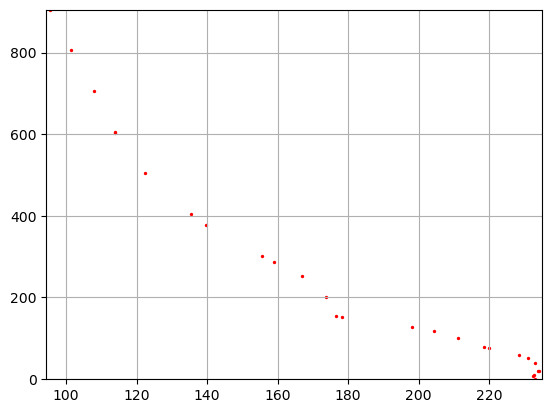

In [17]:
x = np.arange(np.min(x1)-1, np.max(x1)+1, 0.1)
plt.plot(lagrange(x))
plt.scatter(x1,y1, s=2, c = 'red')
plt.xlim (np.min(x1)-1, np.max(x1)+1)
plt.ylim (np.min(y1)-1, np.max(y1)+1)
plt.grid(True)
plt.show()

Видим деление на 0, надо исправить.

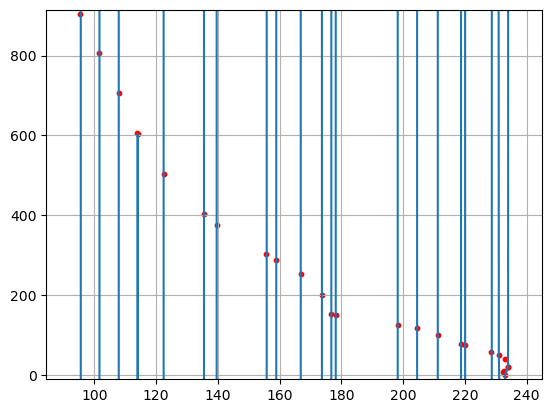

In [76]:
k = np.arange(0, 250, 1)
plt.plot(k,lagrange(k))
plt.scatter(x1,y1,s =10, c = 'red')
plt.xlim (np.min(x1)-11, np.max(x1)+11)
plt.ylim (np.min(y1)-11, np.max(y1)+11)
plt.grid(True)
plt.show()

Вывод: С помощью Python можно решать задачи вычислительной математики. Есть множество библиотек для удобной работы с данными и наглядной визуализации. Всё эти достоинства делают этот язык программирования одним из самых популярных. 